# Find out new buildings via S1 SAR data

Synthetic aperture radar (SAR) images are used to generate maps of surface deformation or digital elevation, using differences in the phase of the waves returning to the satellite.<br> 
The classification of urban areas in terms of land-use/land-cover (LULC) maps is a challenging as well as essential task in order to monitor how the urban sprawl is changing the environment. This trial notebook is dedicated to the visualisation of the built-up area extended near Wuhan, where a new hospital has been built in 10 days during the COVID-19 emergency. To this aim we use the <font color="red"> S1 L1 Ground Range Detected (GRD)</font> products with high resolution (H), sensed before and after the building site in order to detect the environmental changes.

In [1]:
import data_processing_S1 as dp

In [2]:
files = dp.open_band(dp.product("list_remote.txt")) # open GRDH images from your list of products

## Clip the image 
✂️ Let's clip the data set defining a tuple of coordinates as input. `SEARCH.ipynb` trial notebook may help you to find out vertexes (drawing a polygon on the map), or also you can use [Google Earth](https://www.google.it/intl/it/earth/).

In [3]:
coords = (114.06722222, 30.52527778, 114.095, 30.54) # xmin,ymin,xmax,ymax
dp.wrap(coords,files) # call a gdal script to clip files from list 
# clipped images are put into the clipped_files folder

gdalwarp -te 114.06722222 30.52527778 114.095 30.54 /mnt/Copernicus/RADAR/LEVEL-1/2019/12/22/S1A_IW_GRDH_1SDV_20191222T102745_20191222T102810_030460_037C9E_02EE.zip/S1A_IW_GRDH_1SDV_20191222T102745_20191222T102810_030460_037C9E_02EE.SAFE/measurement/s1a-iw-grd-vh-20191222t102745-20191222t102810-030460-037c9e-002.tiff /home/jupyter-g.cipolletta/Trials/S1/clipped_files/s1a-iw-grd-vh-20191222t102745-20191222t102810-030460-037c9e-002_clip.tiff 

Wrapping image: s1a-iw-grd-vh-20191222t102745-20191222t102810-030460-037c9e-002
gdalwarp -te 114.06722222 30.52527778 114.095 30.54 /mnt/Copernicus/RADAR/LEVEL-1/2020/03/27/S1A_IW_GRDH_1SDV_20200327T102743_20200327T102808_031860_03AD56_715D.zip/S1A_IW_GRDH_1SDV_20200327T102743_20200327T102808_031860_03AD56_715D.SAFE/measurement/s1a-iw-grd-vh-20200327t102743-20200327t102808-031860-03ad56-002.tiff /home/jupyter-g.cipolletta/Trials/S1/clipped_files/s1a-iw-grd-vh-20200327t102743-20200327t102808-031860-03ad56-002_clip.tiff 

Wrapping image: s1a-iw-grd-v

## Find out differences before and after the build-up!

Run the following cell to visualise the results. <br>
👉 New buildings are whiter due to the higher backscattering they show. You can easily detect them in the second panel near the centre of the figure ($y_c\sim 30.531;\,x_c\sim 114.083$). The colorbar indicates the [backscattering coefficient](https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/ers/instruments/sar/applications/radar-courses/content-2/-/asset_publisher/qIBc6NYRXfnG/content/radar-course-2-parameters-affecting-radar-backscatter).

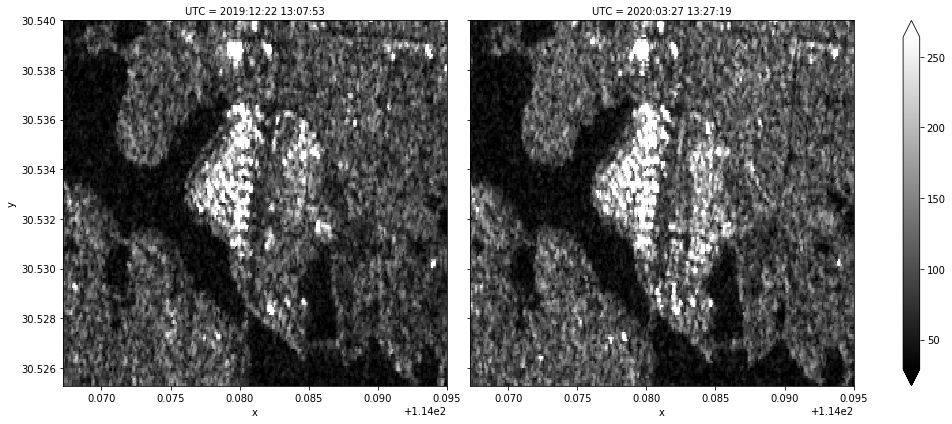

In [4]:
ds = dp.image()